In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_spss('r32h_os.sav')
data

,bbredid_h,bbid_h,aaid_h,zid_h,yid_h,xid_h,wid_h,vid_h,uid_h,tid_h,...,bbf16.4,bbf16.5,bbg1.1,bbg1.2,bbg2,bbg3,bbg4,bbg5,bbg6,bbg7
0,663.0,10003.0,10003.0,10003.0,10003.0,10003.0,10003.0,10003.0,10003.0,10003.0,...,"Нет, не было",НУЖДЫ НЕ БЫЛО,Нет,Нет,Дружеское и заинтересованное,Не очень хорошо,Чувствовал себя свободно,"Несообразительный, нуждался в повторном чтении...","Значительно более искренен и открыт, чем больш...",Надежная
1,666.0,10014.0,10014.0,10014.0,10014.0,10014.0,10014.0,10014.0,10014.0,10014.0,...,"Нет, не было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
2,667.0,10016.0,10016.0,10016.0,10016.0,10016.0,10016.0,10016.0,10016.0,10016.0,...,"Нет, не было","Нет, не было",Да,Да,Дружеское и заинтересованное,Не очень хорошо,Чувствовал себя свободно,"Несообразительный, нуждался в повторном чтении...","Очень закрытый, неискренний",Записано недостаточно информации
3,668.0,10018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Нет, не было","Нет, не было",Нет,Нет,Нетерпеливое и беспокойное,Не очень хорошо,Нервничал,"Несообразительный, нуждался в повторном чтении...","Очень закрытый, неискренний",Записано недостаточно информации
4,669.0,10023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Нет, не было","Нет, не было",Да,Нет,Не особенно заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Очень закрытый, неискренний",Записано недостаточно информации
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,6648.0,14290013.0,14290013.0,14290013.0,14290013.0,14290013.0,NaN,NaN,NaN,NaN,...,"Нет, не было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
4784,6649.0,14290014.0,14290014.0,14290014.0,14290014.0,14290014.0,NaN,NaN,NaN,NaN,...,"Нет, не было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
4785,5287.0,14290015.0,14290015.0,14290015.0,14290015.0,14290015.0,NaN,NaN,NaN,NaN,...,"Нет, не было",НУЖДЫ НЕ БЫЛО,Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
4786,6650.0,14290017.0,14290017.0,14290017.0,14290017.0,14290017.0,NaN,NaN,NaN,NaN,...,"Нет, не было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная


In [3]:
dt = data[['bbb1.o','bbb1.n','bbf11']] # family size and income

In [4]:
dt['bbb1.o'] = dt['bbb1.o'].fillna(0)
dt['bbb1.n'] = dt['bbb1.n'].fillna(0)
dt['family_size'] = dt['bbb1.o'] + dt['bbb1.n']
dt1 = dt[['family_size', 'bbf11']]
dt1 = dt1.dropna()
dt1 = dt1[pd.to_numeric(dt1['bbf11'], errors='coerce').notnull()]
dt1

/var/folders/k3/d595fscx0sd4p776t_nkpc3h0000gn/T/ipykernel_60847/526996585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['bbb1.o'] = dt['bbb1.o'].fillna(0)
/var/folders/k3/d595fscx0sd4p776t_nkpc3h0000gn/T/ipykernel_60847/526996585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['bbb1.n'] = dt['bbb1.n'].fillna(0)
/var/folders/k3/d595fscx0sd4p776t_nkpc3h0000gn/T/ipykernel_60847/526996585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,family_size,bbf11
2,4.0,101000.0
3,3.0,24000.0
4,5.0,12000.0
5,3.0,69000.0
7,6.0,220000.0
...,...,...
4775,1.0,17000.0
4777,3.0,273500.0
4781,2.0,49500.0
4783,5.0,180000.0


In [5]:
dt1['bbf11'] = dt1['bbf11'].replace(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА'], pd.NA)
dt1['bbf11']

2       101000.0
3        24000.0
4        12000.0
5        69000.0
7       220000.0
          ...   
4775     17000.0
4777    273500.0
4781     49500.0
4783    180000.0
4784    115000.0
Name: bbf11, Length: 3029, dtype: category
Categories (467, float64): [1200.0, 1300.0, 1500.0, 1900.0, ..., 400000.0, 431200.0, 700000.0, 805000.0]

In [6]:
dt1['bbf11'] = dt1['bbf11'].apply(lambda x: int(x))
dt1

,family_size,bbf11
2,4.0,101000
3,3.0,24000
4,5.0,12000
5,3.0,69000
7,6.0,220000
...,...,...
4775,1.0,17000
4777,3.0,273500
4781,2.0,49500
4783,5.0,180000


In [7]:
d = dict()
for x in range(1,16):
    l = list((dt1[dt1['family_size']==x])['bbf11'])
    if l==[]:
        continue
    d[x] = sum(l)/len(l)
d

{1: 38175.075921908894,
 2: 56268.81796690307,
 3: 77704.21895861148,
 4: 92731.05215827338,
 5: 105910.85152838429,
 6: 111277.0,
 7: 120787.5,
 8: 153090.9090909091,
 9: 104153.75,
 10: 110994.54545454546,
 11: 173875.0,
 12: 107433.33333333333,
 14: 167850.0,
 15: 431200.0}

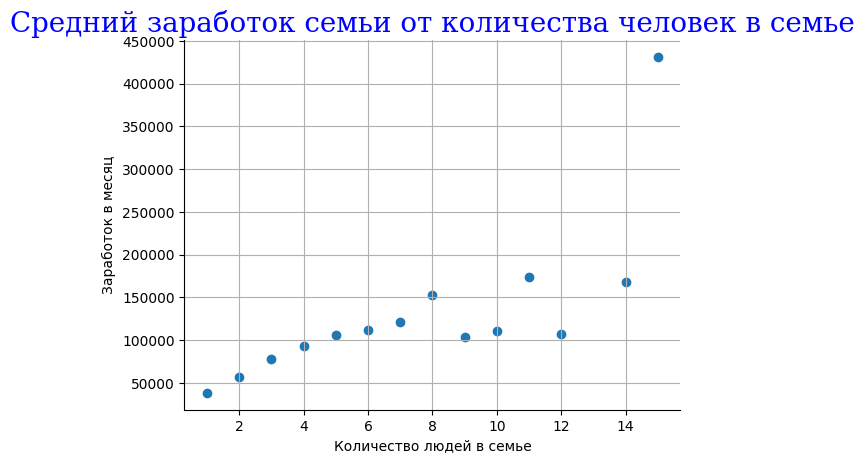

In [11]:
plt.scatter(d.keys(),d.values())
ax = plt.gca()  
plt.grid()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title("Средний заработок семьи от количества человек в семье",{'family':'serif','color':'blue','size':20})
plt.xlabel("Количество людей в семье")
plt.ylabel("Заработок в месяц")
plt.show()